<a href="https://colab.research.google.com/github/akinami3/jupyter_robotics/blob/main/robot_arm/foward_kinematics_homogeneous_transformation_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 同次変換による順運動学のイメージ
同次変換行列による順運動学では、下動画のように

- 各リンクに座標系を張り付け、
- 「リンク1座標系$\Sigma_{1}$」→「リンク2座標系$\Sigma_{2}$」→　... →「エンドエフェクタ座標系$\Sigma_{\mathrm{e}}$」と順番に座標変換を繰り返すことで
- 「リンク1座標系$\Sigma_{1}$」から見た時の「エンドエフェクタ座標系$\Sigma_{\mathrm{e}}$」の位置·姿勢を求める

ことができます。

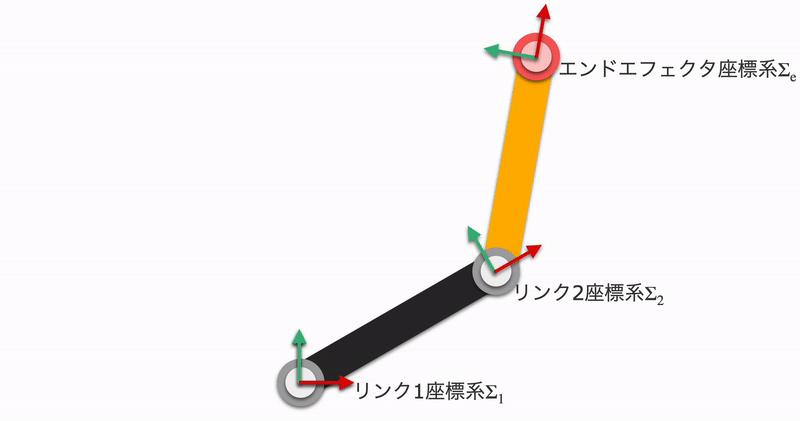

このように、同次変換行列による解法では機械的に解を求めることができるため、三角関数による解法に比べて計算を考えるのが楽になります。

# 同次変換行列とは

前章で「同次変換による順運動学のイメージ」を紹介しましたが、

- そもそも「同次変換行列」って何？

と思っている方もいると思います。
そこで、ここではロボットにおける「同次変換行列」について説明したいと思います。

同次変換行列を使用すると、下図のように「座標系1 $\Sigma_1$」を

- 平行移動
- 回転

して、「座標系2 $\Sigma_2$」に移動させることができます（座標変換）。

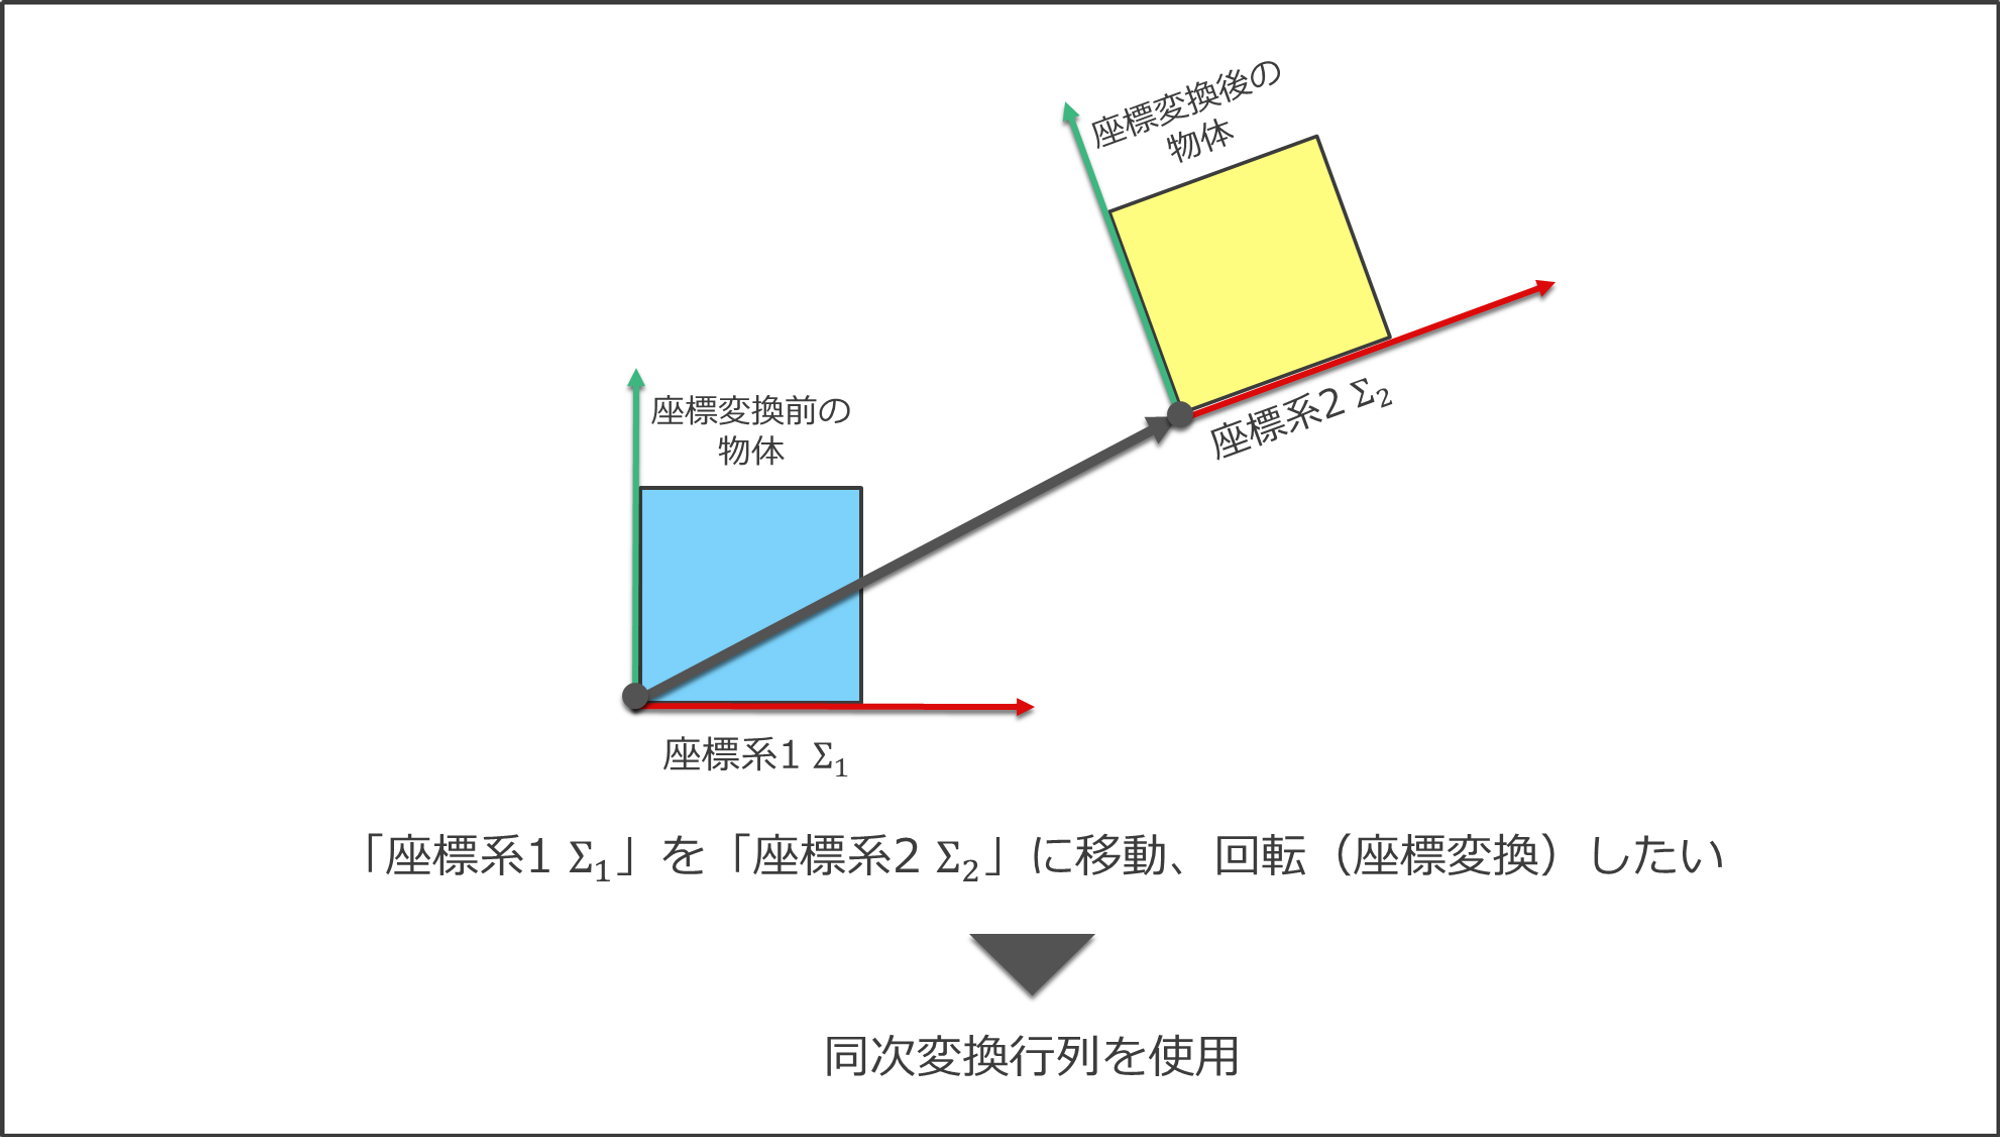

## 平行移動行列

先述したように、同次変換行列は「平行移動」「回転」を行うことができます。

しかし、一気に説明するとイメージがつかみにくいと思うのでまずは

- 平行移動

に対象を絞って説明したいと思います。

ある座標系を平行移動させる行列は

- 平行移動行列

と呼ばれ、2次元の場合、式(1)で定義されます。

$$
\begin{pmatrix}
x^{\prime} \\
y^{\prime}\\
1\\
\end{pmatrix}
=
\begin{pmatrix}
1 & 0 & t_x \\
0 & 1 & t_y \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix}
\\
\tag{1}
$$

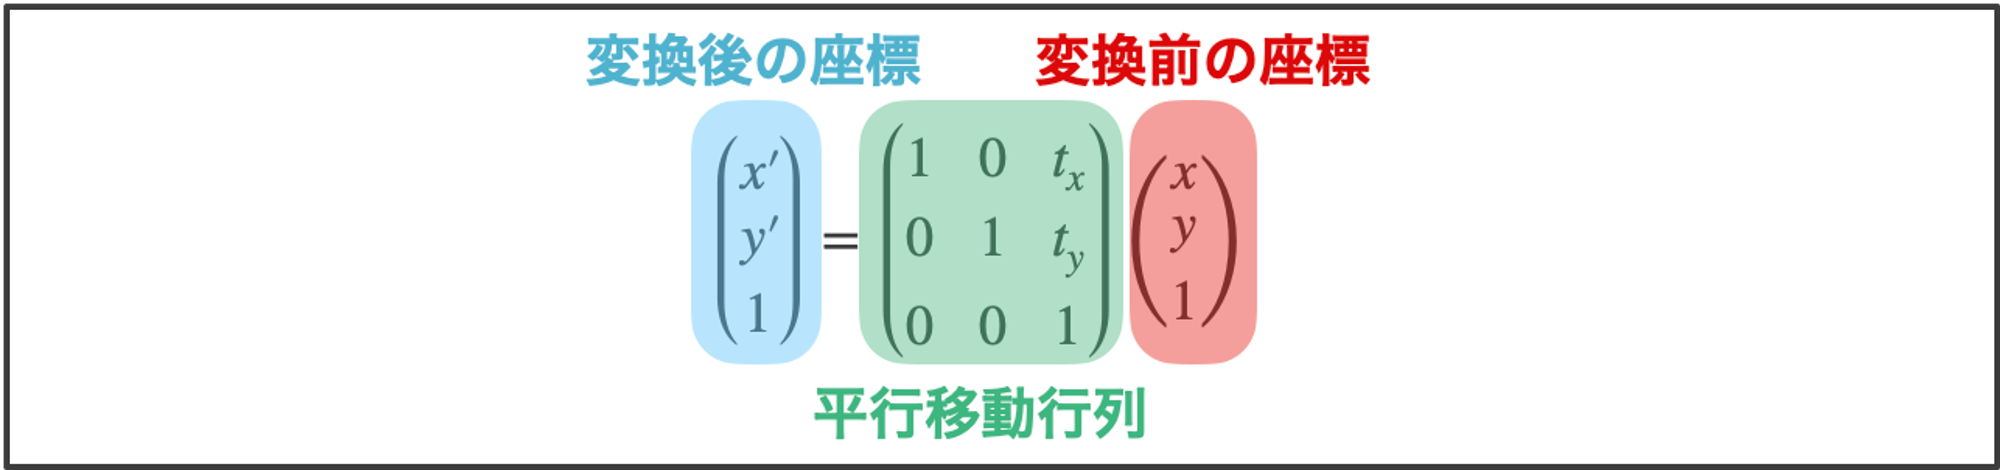

---

- $x^{\prime}$ : 変換**後**の$x$座標
- $y^{\prime}$ : 変換**後**の$y$座標
- $t_x$ : $x$軸方向の移動量
- $t_y$ : $y$軸方向の移動量
- $x$ : 変換**前**の$x$座標
- $y$ : 変換**前**の$y$座標


---

<br>

ここで、変換後の座標 $(x^\prime, y^\prime)$ は

**「座標系1 $\Sigma_1$」の原点**

から見た時の座標になっていることに注意してください。



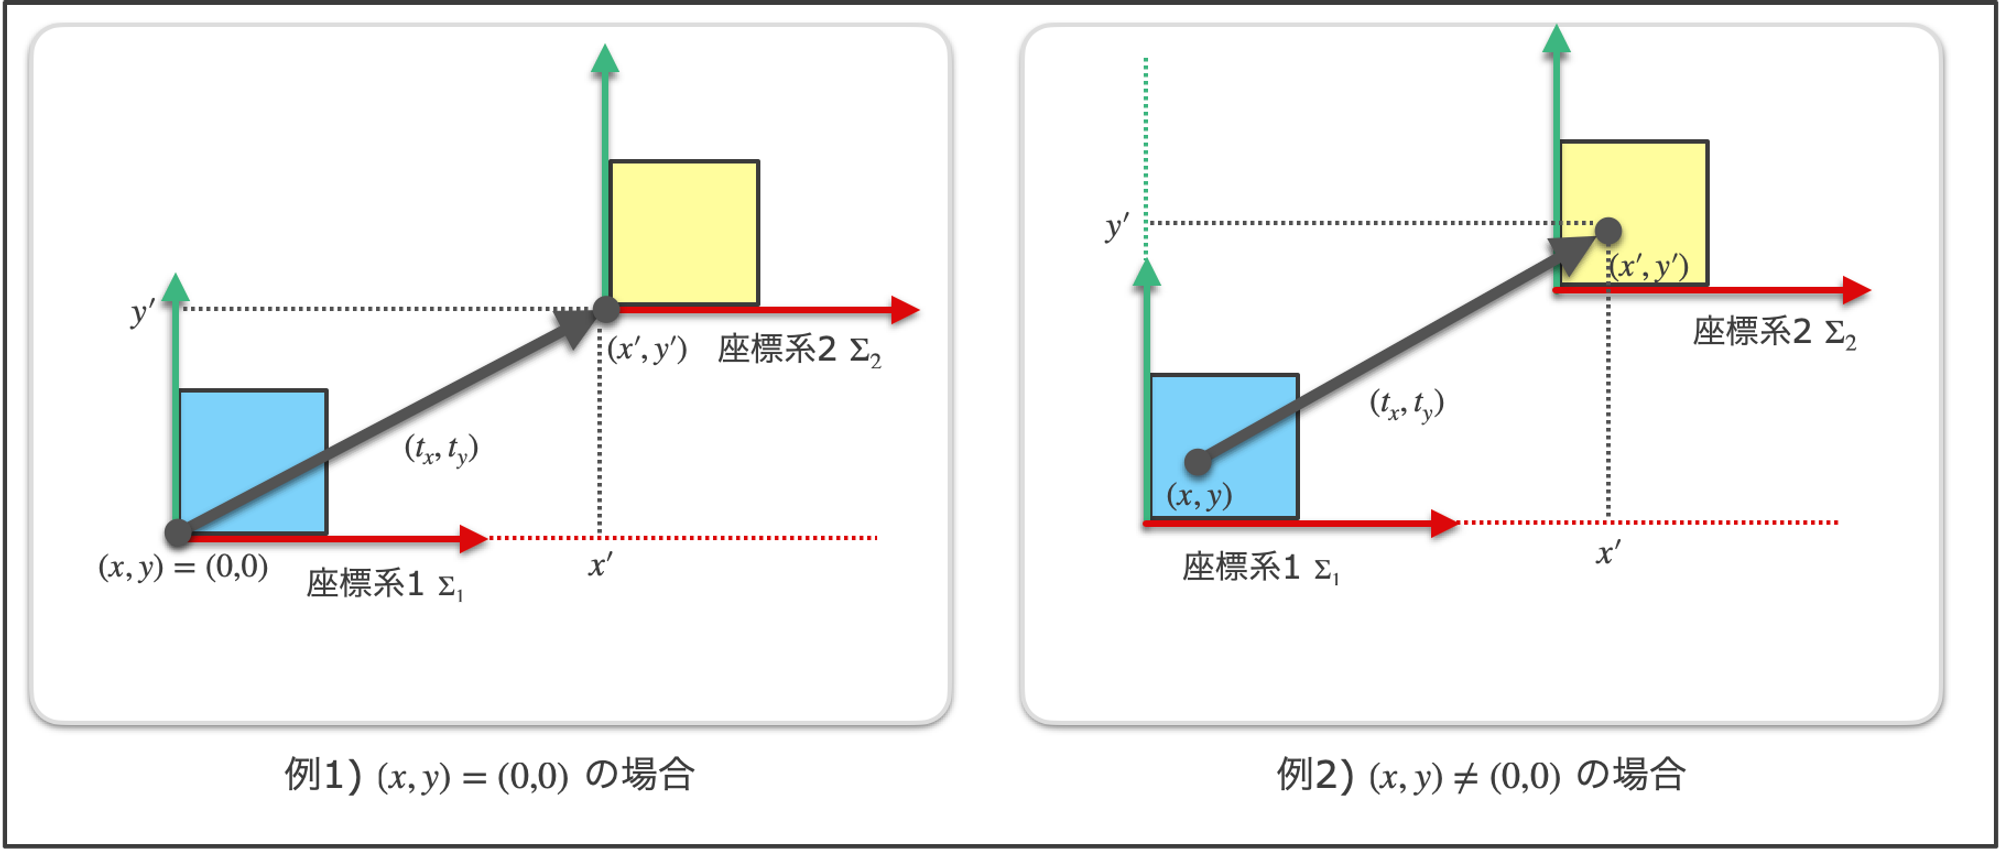

---
⚠️ 平行移動は下式のように、足し算の形で表現することもできます。

$$
\begin{pmatrix}
x^{\prime} \\
y^{\prime}\\
\end{pmatrix}
=
\begin{pmatrix}
x \\
y \\
\end{pmatrix}
+
\begin{pmatrix}
t_x \\
t_y \\
\end{pmatrix}
$$

しかし、一般に掛け算で表現できる方が、（計算において）都合が良いことが多いので、ここでも3×3の行列で平行移動行列を定義しています。

---

変換前 = ( 0 , 0 )
変換後 = ( 3 , 2 )


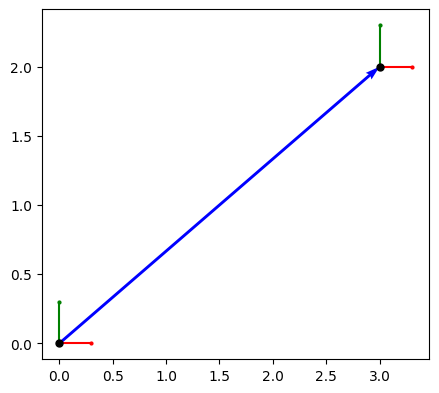

In [1]:
import numpy as np

def make_2d_translation_matrix(tx, ty):
    """
    2次元平面における平行移動行列を求める

    Parameters
    ----------
    tx : float
        x軸方向の移動
    ty : float
        y軸方向の移動

    Returns
    -------
    translation_matrix : numpy.ndarray
        2次元の平行移動行列
    """
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0,  1]])

##### ここを変更すると結果が変わります #######
# 変換前座標
x1, y1 = 0, 0
# 平行移動量（tx, ty）
tx, ty = 3, 2
#############################################

# 座標系1->座標系2への平行移動行列
T12 = make_2d_translation_matrix(tx,ty)

# 変換前 (x1, y1, 1)^T
o1 = np.array([[x1],
               [y1],
               [1]])

# 座標変換
o2 = T12@o1

# 変換後の座標(x2, y2)
x2, y2 = o2[0][0], o2[1][0]

# （座標系1から見た時の）各座標系の位置を表示
print("変換前 = (", x1, ",", x1, ")")
print("変換後 = (", x2, ",", y2, ")")

########################### 以下描画用 ########################
import matplotlib.pyplot as plt

def draw_link_coordinate(ax, matrix, axes_length):
    """
    2次元の変換行列より単位ベクトルを描画

    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])

    x = matrix[0][2]; y = matrix[1][2]

    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2)
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2)

fig = plt.figure(figsize=(5,10))
ax = fig.add_subplot(2,1,1)
axes_length = 0.3
draw_link_coordinate(ax, np.array([[1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]]), axes_length) # 座標系1の描画
ax.plot(x1, y1, marker='.', markersize=10, color="black") # 変換前座標(x1,y1)
draw_link_coordinate(ax, T12, axes_length) # 座標系2の描画
ax.plot(x2, y2, marker='.', markersize=10, color="black") # 変換後座標(x2,y2)
plt.quiver(x1, y1, (x2-x1), (y2-y1), angles='xy', scale_units='xy', scale=1, color="blue") # (x1,y1)->(x2,y2)へ向かうベクトル


## 回転行列

次に、

- 回転行列

について説明します。

回転行列はある座標を原点周りに回転移動させる行列のことで、2次元の場合は式(2)で定義されます。

$$
\begin{pmatrix}
x^{\prime}\\
y^{\prime}\\
1\\
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix} \\
\tag{2}
$$

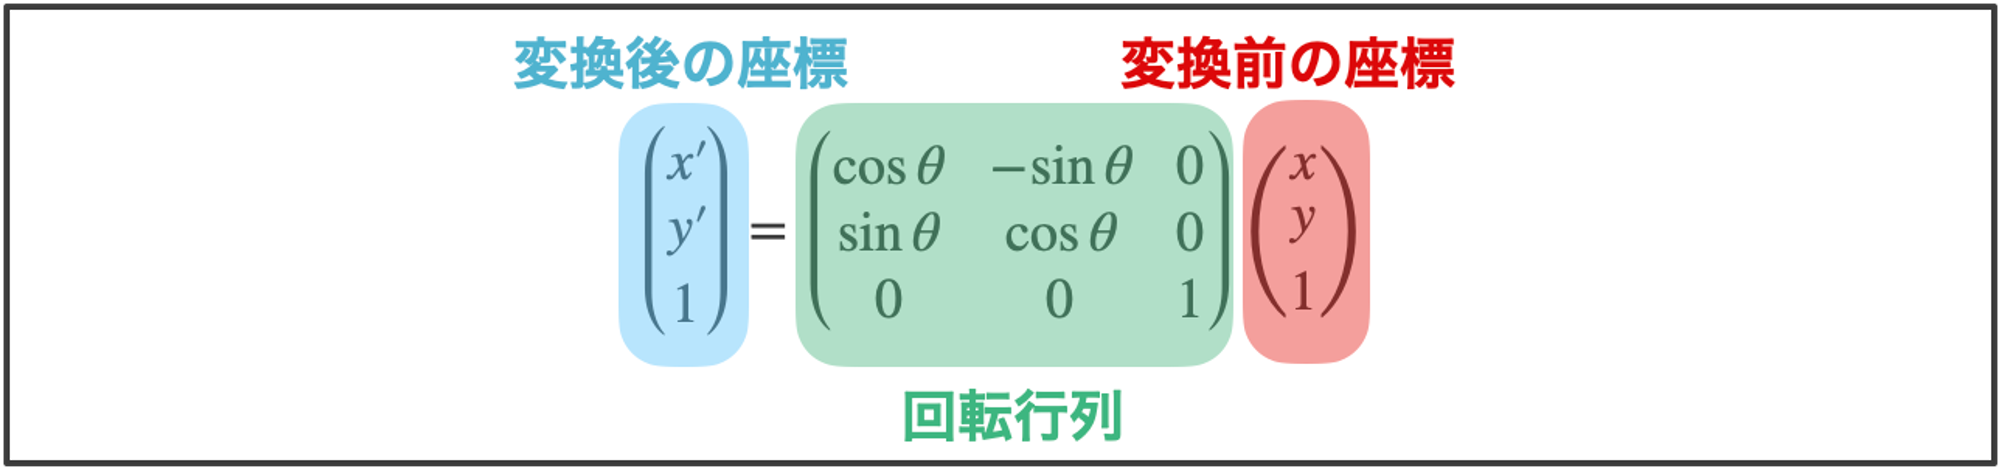

---

- $x^{\prime}$ : 変換**後**の$x$座標
- $y^{\prime}$ : 変換**後**の$y$座標
- $\theta$ : 回転角度（rad）
- $x$ : 変換**前**の$x$座標
- $y$ : 変換**前**の$y$座標

---

<br>

平行移動の時と同様に、変換後の座標 $(x^\prime, y^\prime)$ は

**「座標系1 $\Sigma_1$」の原点**

から見た時の座標になっていることに注意してください。

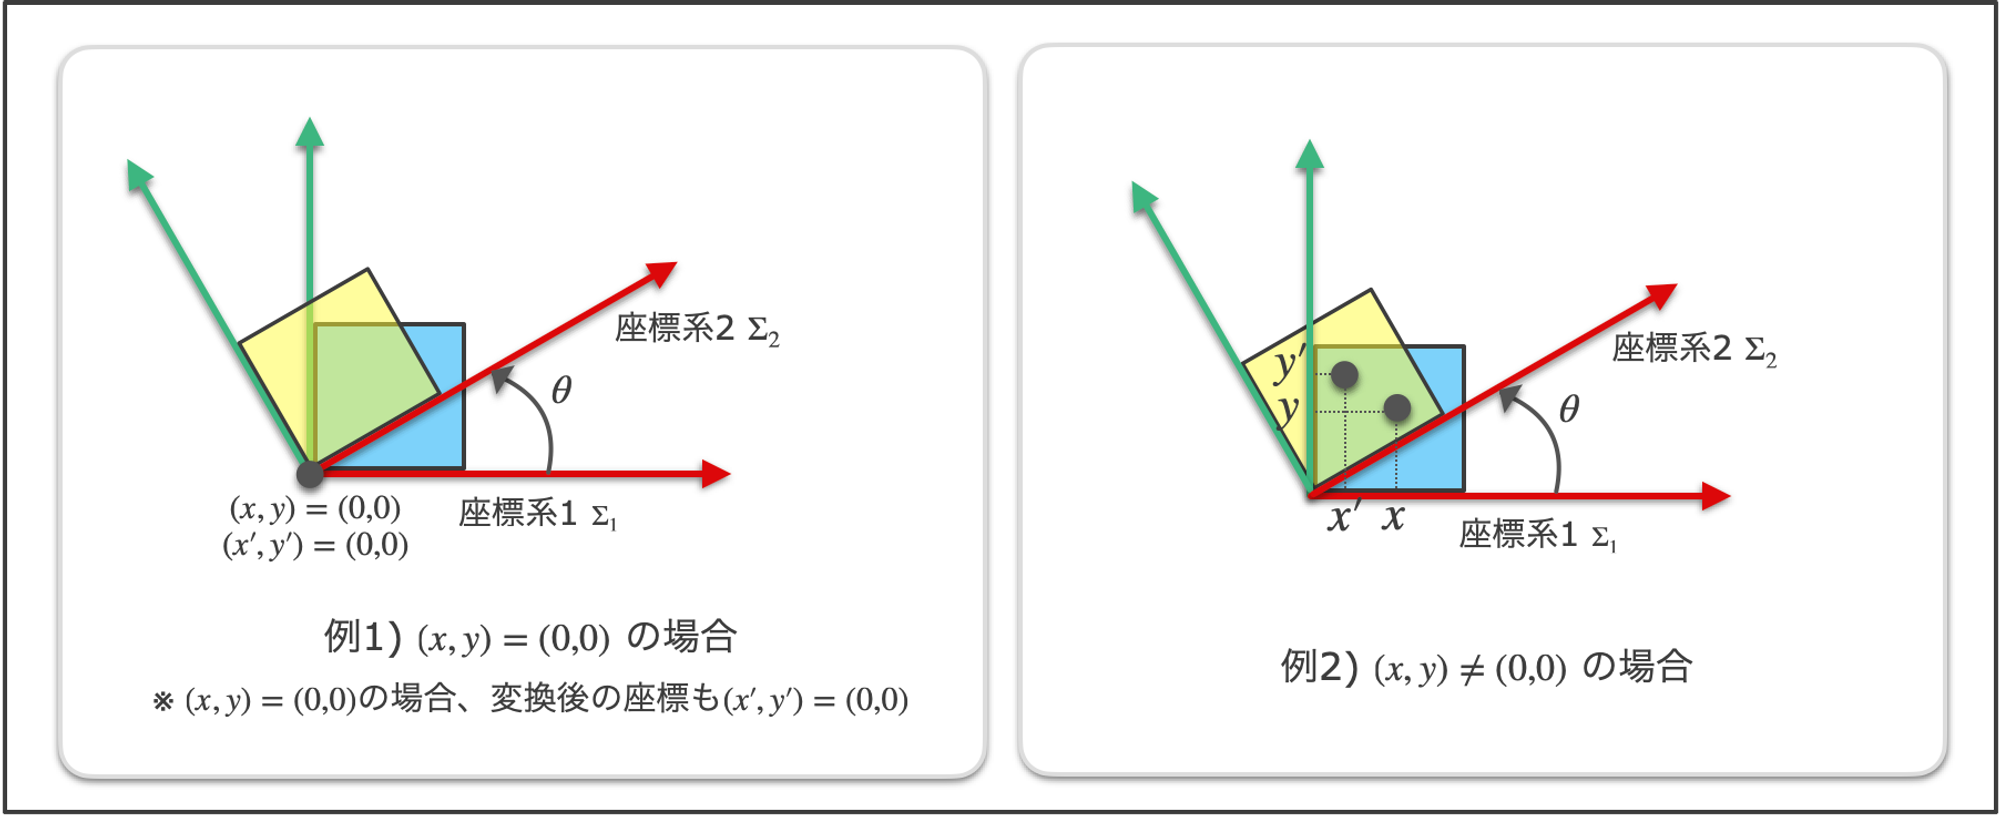

変換前 ( 0 , 0 )
変換後 ( 0.0 , 0.0 )


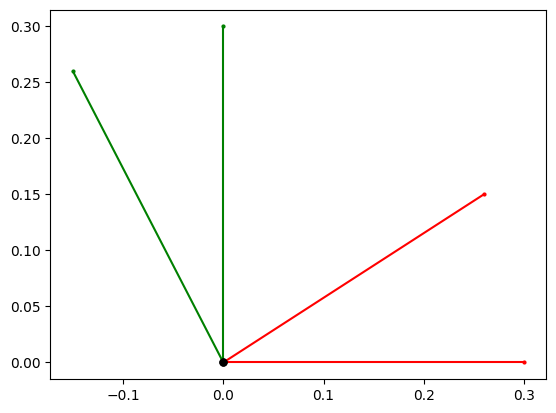

In [2]:
import numpy as np
import math

def make_2d_rotate_matrix(theta):
    """
    2次元平面における回転行列を求める

    Parameters
    ----------
    theta : float
        回転角度(rad)

    Returns
    -------
    2d_rotate_matrix : numpy.ndarray
        2次元の回転行列
    """
    return np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta),  np.cos(theta), 0],
                     [            0,              0, 1]])

##### ここを変更すると結果が変わります #######
# 変換前座標
x1, y1 = 0, 0
# 回転量
theta = 30
#############################################

# 座標系1->座標系2への回転行列
theta = math.radians(theta)
R12 = make_2d_rotate_matrix(theta)

# 変換前 (x1, y1, 1)^T
o1 = np.array([[x1],
               [y1],
               [1]])

# 座標変換
o2 = R12@o1

# 変換後の座標(x2, y2)
x2, y2 = o2[0][0], o2[1][0]

#（座標系1から見た時の）各座標系の位置を表示
print("変換前 (", x1, ",", y1, ")")
print("変換後 (", x2, ",", y2, ")")

########################### 以下描画用 ########################
import matplotlib.pyplot as plt

def draw_link_coordinate(ax, matrix, axes_length):
    """
    2次元の変換行列より単位ベクトルを描画

    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])

    x = matrix[0][2]; y = matrix[1][2]

    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2)
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

axes_length = 0.3
draw_link_coordinate(ax, np.array([[1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]]), axes_length) # 座標系1の描画
ax.plot(x1, y1, marker='.', markersize=10, color="black") # 変換前座標(x1,y1)
draw_link_coordinate(ax, R12, axes_length) # 座標系2の描画
ax.plot(x2, y2, marker='.', markersize=10, color="black") # 変換前座標(x2,y2)


## 同次変換行列

ここまでで、座標変換をおこなえる行列として

- 平行移動行列
- 回転行列

の2種類を紹介しました。

上記の二つの行列を組み合わせることで、ロボットアームにおける同次変換行列を定義することができます。

<br>

2次元平面におけるロボットアームでは、一般に

- リンク座標系はリンクの長さ方向に$x$軸をとります[^2]

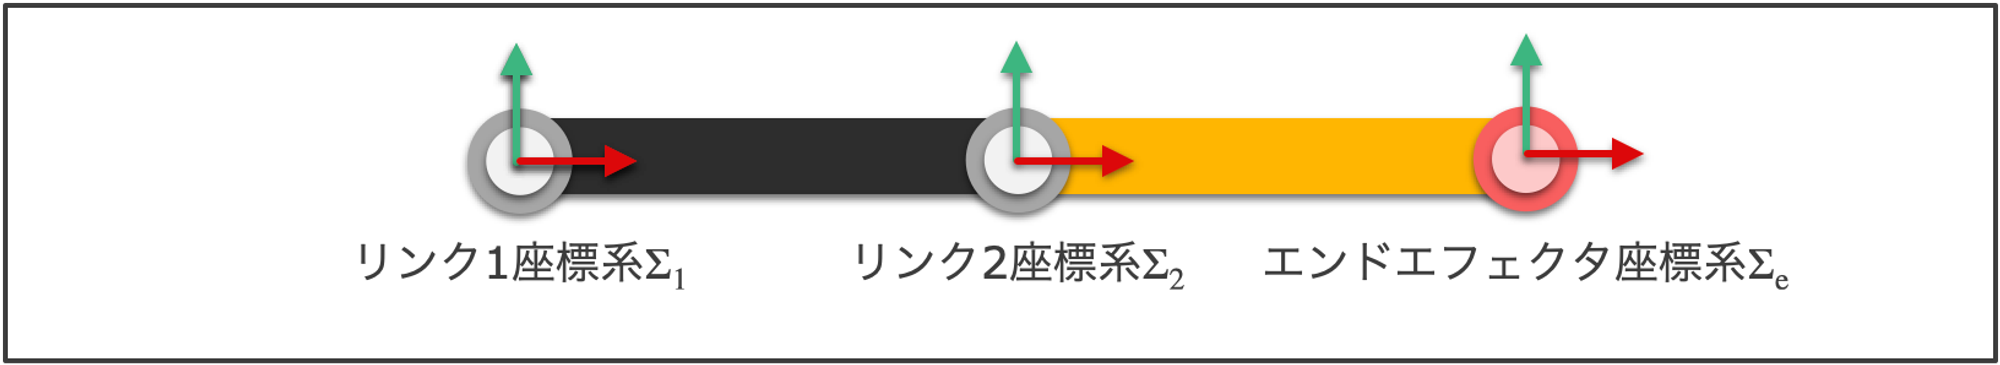

<br>

そのため、２次元平面におけるロボットアームの場合

1. 原点周りに $\theta$ 回転（回転行列）
2. $x$ 軸方向（リンクの長さ方向）に 「リンク長$l$」 だけ平行移動する（平行移動行列）

といった手順で座標変換することができます。

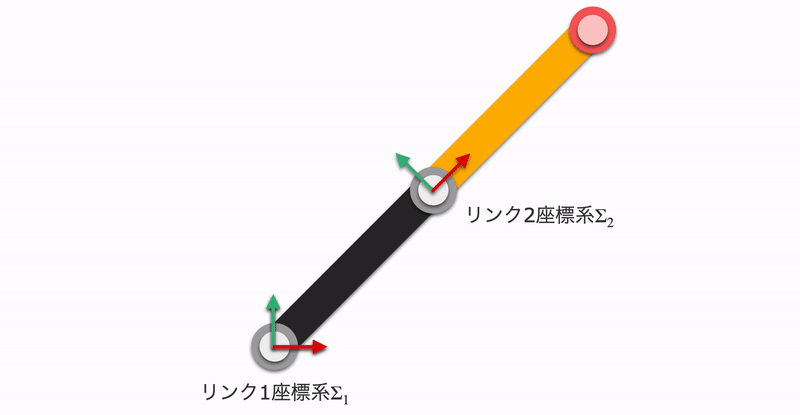

これを式で表すと式(3)のように表現されます。

$$
\begin{aligned}
\begin{pmatrix}
x^{\prime} \\
y^{\prime}\\
1\\
\end{pmatrix}
&=
\begin{pmatrix}
\cos\theta & -\sin\theta & 0 \\
\sin\theta & \cos\theta & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
1 & 0 & l \\
0 & 1 & 0 \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix} \\
&=
\begin{pmatrix}
\cos\theta & -\sin\theta & l \cos\theta \\
\sin\theta & \cos\theta & l \sin\theta \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x \\
y \\
1 \\
\end{pmatrix} \\
\end{aligned}
 \\
\tag{3}
$$

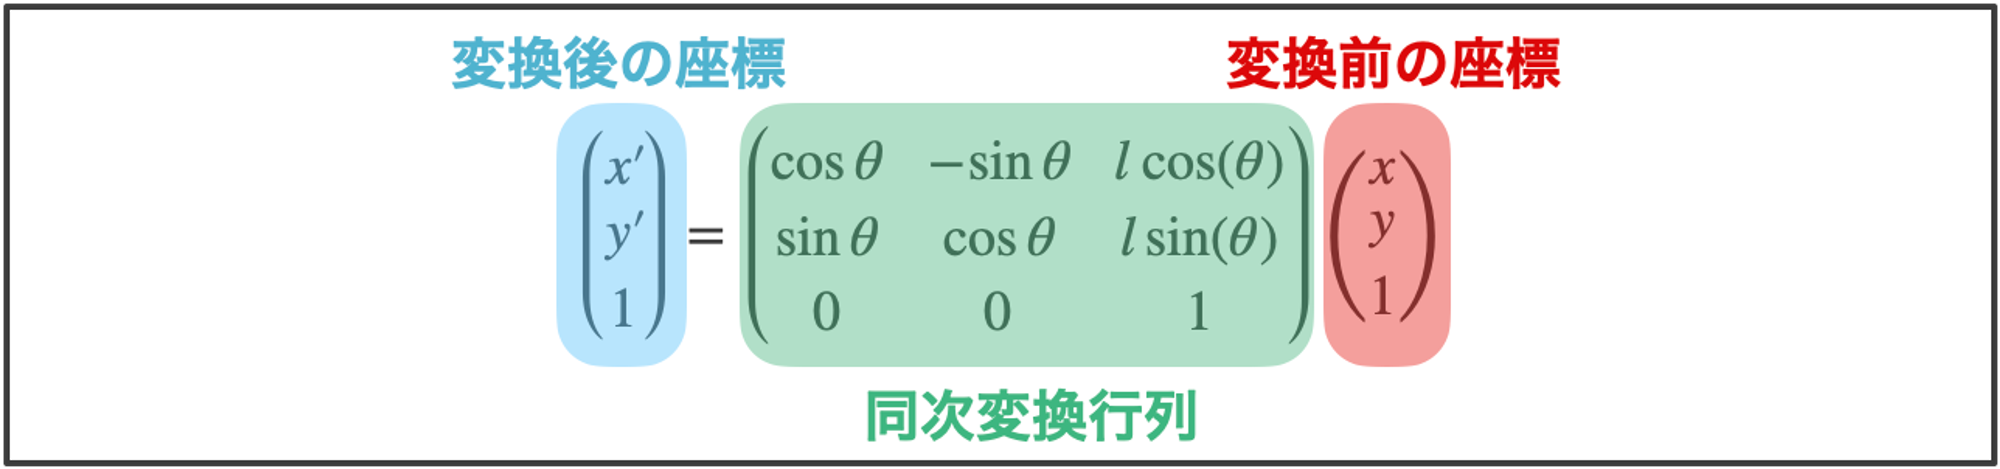

---

- $x^{\prime}$ : 変換**後**の$x$座標
- $y^{\prime}$ : 変換**後**の$y$座標
- $\theta$ : リンクの回転角度（rad）
- $l$ : リンクの長さ（$x$軸方向の移動量）
- $x$ : 変換**前**の$x$座標
- $y$ : 変換**前**の$y$座標

---

# 同次変換行列で順運動学を解く

ここまでで、同次変換行列について分かったと思うので、ここからは、本題である「同次変換行列による順運動学の解法」について説明していきます。

順運動学では、

- 「ロボットアームの根本」から見た時の「ロボットアームの先端位置」

すなわち

- 「リンク1座標系$\Sigma_{1}$の原点」から見た時の「エンドエフェクタ座標系$\Sigma_{\mathrm{e}}$の原点」の位置

を求めたいということになります。

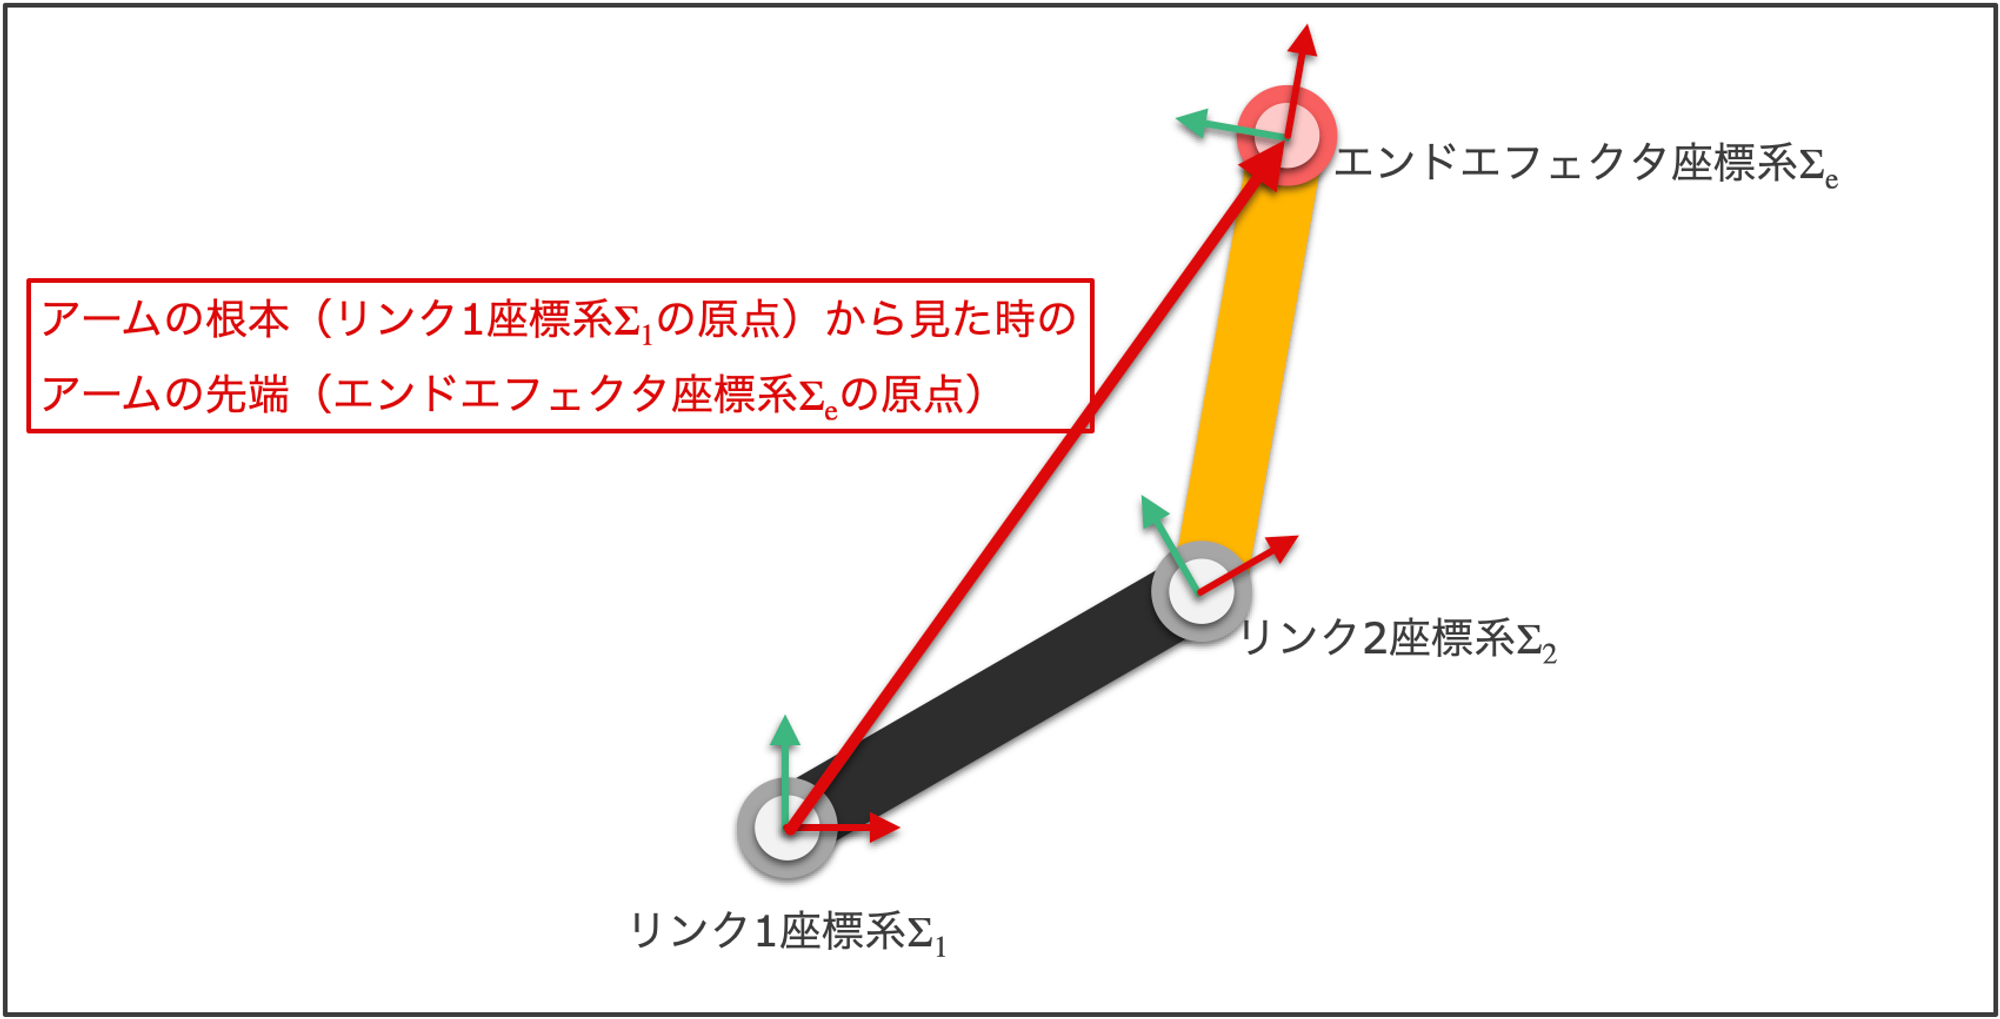

そのため、
「リンク1座標系$\Sigma_{1}$ → エンドエフェクタの座標系$\Sigma_{\mathrm{e}}$へ変換する同次変換行列」

があると便利なわけですが、これは同次変換行列の

- チェーンルール

という性質を利用することで求めることができます。

<br>

チェーンルールは

- 「**リンク1座標系 $\Sigma_{1}$** → リンク2座標系 $\Sigma_{2}$へ変換する同次変換行列」
- 「リンク2座標系 $\Sigma_{2}$ → **エンドエフェクタ座標系$\Sigma_{\mathrm{e}}$**へ変換する同次変換行列」

を左から右に順番にかけたあとの同次変換行列は

- 「**リンク1座標系$\Sigma_{1}$** → **エンドエフェクタ座標系$\Sigma_{\mathrm{e}}$**へ変換する同次変換行列」

と等しいといった性質であり、式にすると式(4)のようになります。

$$
\begin{aligned}
\begin{pmatrix}
x_{\mathrm{e}} \\
y_{\mathrm{e}}\\
1\\
\end{pmatrix}
&=
\begin{pmatrix}
\cos\theta_1 & -\sin\theta_1 & l_1 \cos\theta_1 \\
\sin\theta_1 & \cos\theta_1 & l_1 \sin\theta_1 \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
\cos\theta_2 & -\sin\theta_2 & l_2 \cos\theta_2 \\
\sin\theta_2 & \cos\theta_2 & l_2 \sin\theta_2 \\
0 & 0 & 1 \\
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
y_{1} \\
1 \\
\end{pmatrix} \\
\end{aligned}
 \\
\tag{4}
$$

---

🔍 今回例に出しているロボットアームのように、「リンク1座標系 $\Sigma_{1}$ の**原点**」を基準とすることが多いため、式(4)は基本的に $x_{1} = 0, y_{1}=0$ と考えればよいです。

---


ここで、式を見やすくするために

- 「リンク $i$ 座標系 $\Sigma_{i}$→リンク $i+1$ 座標系 $\Sigma_{i+1}$へ変換する同次変換行列」を $^{i}H_{i+1}$
    - ただし「リンク $i$ 座標系 $\Sigma_{i}$→エンドエフェクタ座標系 $\Sigma_{\mathrm{e}}$へ変換する同次変換行列」は $^{i}H_{\mathrm{e}}$

と定義すると式（5）のように表すことができます

$$
\begin{aligned}
\begin{pmatrix}
x_{\mathrm{e}} \\
y_{\mathrm{e}} \\
1 \\
\end{pmatrix}
&= \ ^{1}H_{2} \ ^{2}H_{\mathrm{e}}
\begin{pmatrix}
x_{1} \\
y_{1} \\
1 \\
\end{pmatrix} \\
&=  \ ^{1}H_{\mathrm{e}}
\begin{pmatrix}
x_{1} \\
y_{1} \\
1 \\
\end{pmatrix}
\end{aligned}
\\
\tag{5}
$$

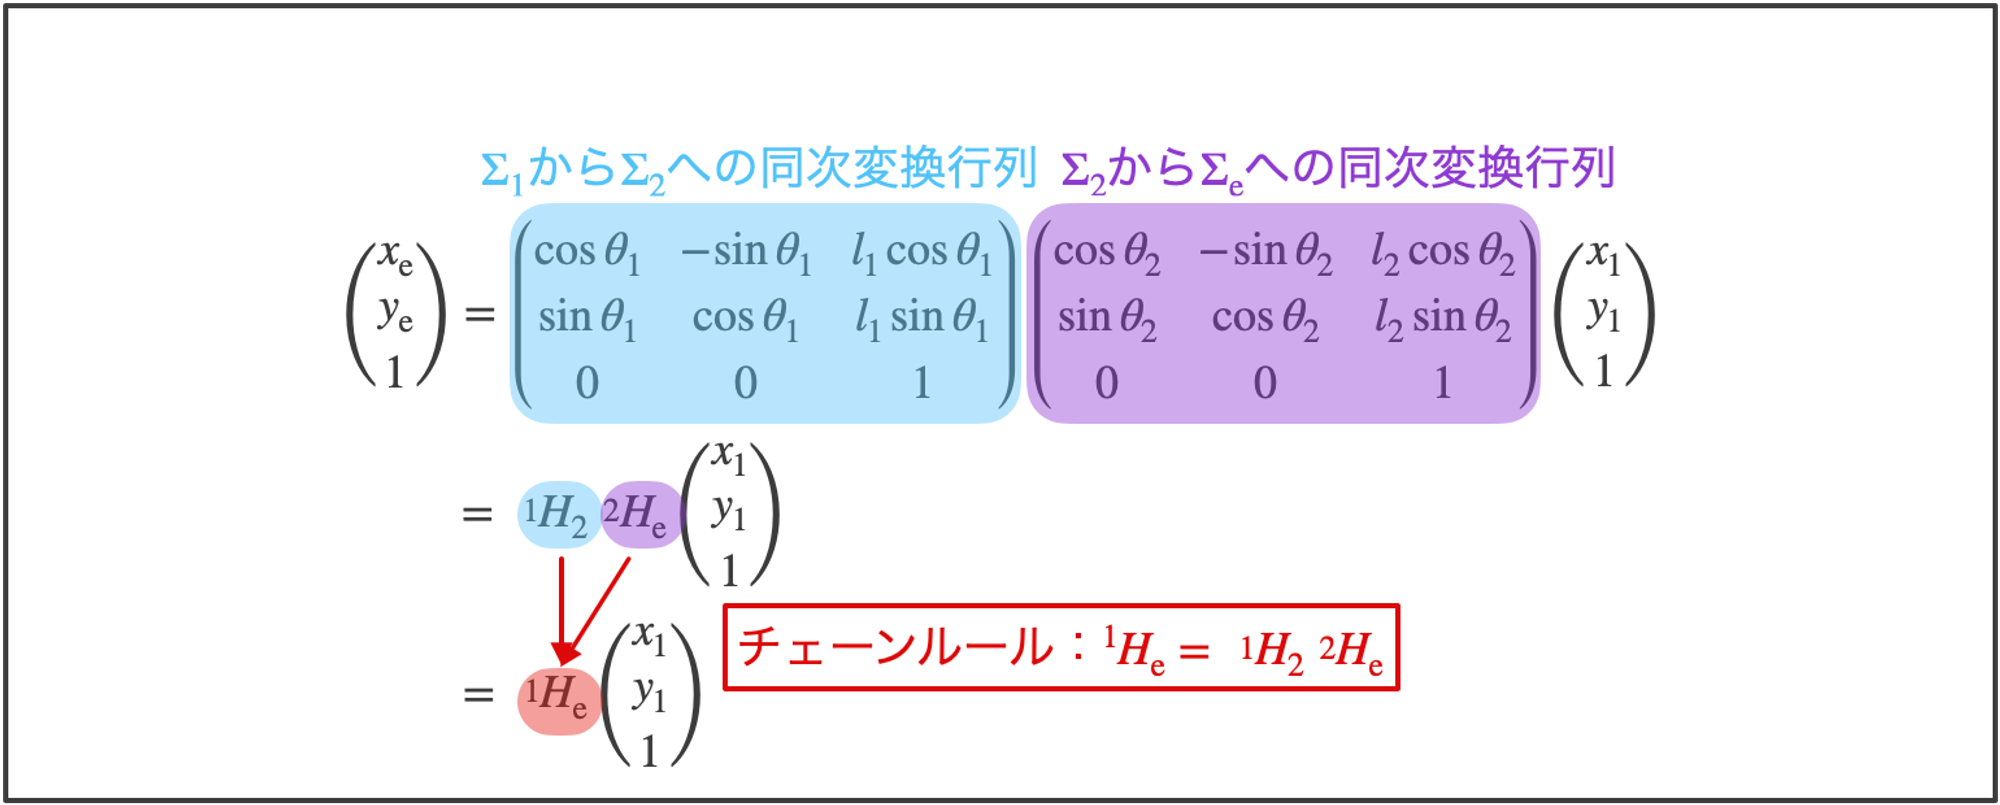

---

🔍 式（5）を見ると、$^{i}H_{i+1} \ ^{i+1}H_{i+2} \ ^{i+2}H_{i+3} ...$ と「右下の添字」→「左上の添字」...と「チェーン」のようにつながっていることが分かります（チェーンルールの名前の由来？）。

---

---

🔍 「順番に座標変換する方法」と「チェーンルールによりあらかじめ作成した同次変換行列を用いて一気に座標変換する方法」を比較すると下動画のようなイメージになります。

- 順番に座標変換

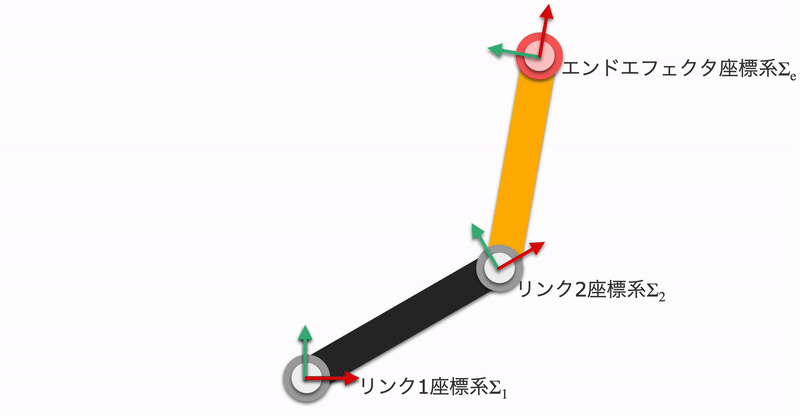

<br>

- 一気に座標変換

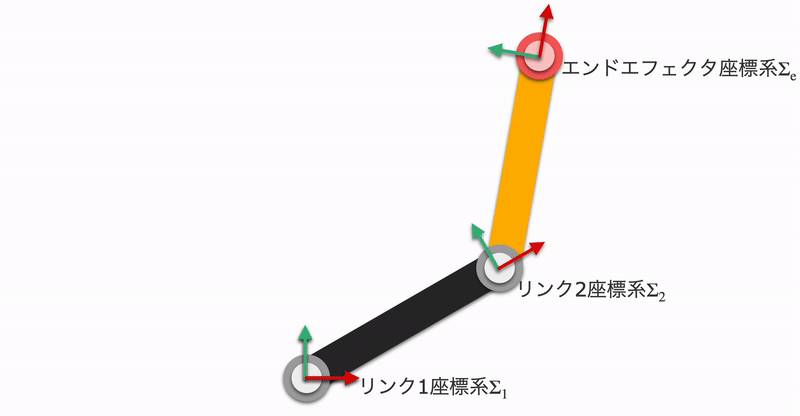

---

## コード

ここまでに説明した内容をpythonで記述すると下記コードのようになります。

下記コードを実行すると、2リンクアームが描画されます。

---

🔍 「各リンクの長さ `l1`, `l2`」と「各リンクの回転角度 `theta1`, `theta2`」を変更すると結果が変わるので、確認してみてください。

---

(xe, ye)= 0.9823619097949593 4.529927863931453


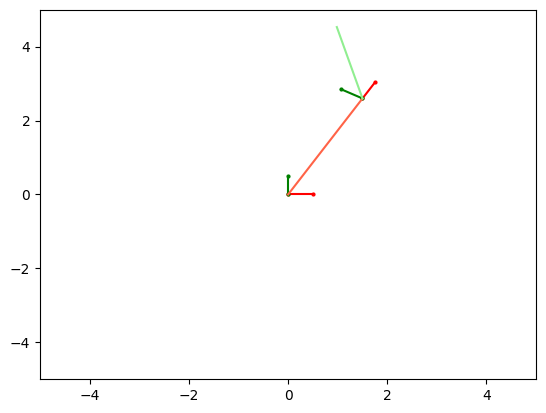

In [3]:
import numpy as np

def make_homogeneous_transformation_matrix(link_length, theta):
    """
    2次元平面における同次変換行列を求める

    Parameters
    ----------
    link_length : float
        リンクの長さ
    theta : float
        回転角度(rad)

    Returns
    -------
    T : numpy.ndarray
        同次変換行列
    """
    return np.array([[np.cos(theta), -np.sin(theta), link_length*np.cos(theta)],
                     [np.sin(theta),  np.cos(theta), link_length*np.sin(theta)],
                     [            0,              0,                        1]])

##### ここを変更すると結果が変わります #######
# 各リンクの長さを定義
l1 = 3.0
l2 = 2.0

# 各リンクの回転角度を定義
theta1 = 60
theta2 = 45
############################################

theta1 = np.deg2rad(theta1)
theta2 = np.deg2rad(theta2)


# リンク1座標系 -> リンク2座標系への変換行列
H12 = make_homogeneous_transformation_matrix(l1, theta1) # T12：link「1」座標系 -> link「2」座標系
# リンク2座標系 -> エンドエフェクタ座標系への変換行列
H2e = make_homogeneous_transformation_matrix(l2, theta2) # T2e：link「2」座標系 ->「e」nd effector座標系

# 「link1座標系 -> エンドエフェクタ座標系に変換する同時変換行列H12e」をあらかじめ定義
H12e = H12@H2e # T1e：link「1」座標系 ->「e」nd effector座標系

x1, y1 = 0, 0
# H12eを使って、link1座標系から見た時の、end effector座標系の位置を求める
oe = H12e@np.array([[x1],
                    [y1],
                    [1]])
xe, ye = oe[0][0], oe[1][0]
print("(xe, ye)=", xe, ye)


############# 以下描画用 ###################################
import matplotlib.pyplot as plt
%matplotlib inline

def draw_link_coordinate(ax, matrix, axes_length):
    """
    2次元の変換行列より単位ベクトルを描画

    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])

    x = matrix[0][2]; y = matrix[1][2]

    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2)
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2)

o2 = H12@np.array([[x1],
                   [y1],
                   [1]])
x2, y2 = o2[0][0], o2[1][0]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.set_xlim(-(l1+l2), l1+l2)
ax.set_ylim(-(l1+l2), l1+l2)

axes_length = (l1+l2)*0.1
draw_link_coordinate(ax, np.array([[1, 0, 0],
                                   [0, 1, 0],
                                   [0, 0, 1]]), axes_length) # 座標系1の描画
draw_link_coordinate(ax, H12, axes_length) # 座標系2の描画

ax.plot([x1, x2], [y1, y2], color="tomato") # link1の描画
ax.plot([x2, xe], [y2, ye], color="lightgreen") # link2の描画

plt.show()


## インタラクティブに角度を変える（おまけ）

上記のコードでも動きの確認はできますが、インタラクティブに角度を変更できた方が理解も深まりやすいと思うので、興味がある方は下記コードもお試しください。

---

⚠️ google colaboratory上では、ラグが発生するため上記動画よりも遅れて描画される可能性があります。


---

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
%matplotlib inline

def make_homogeneous_transformation_matrix(link_length, theta):
    """
    2次元平面における同次変換行列を求める

    Parameters
    ----------
    link_length : float
        リンクの長さ
    theta : float
        回転角度(rad)

    Returns
    -------
    T : numpy.ndarray
        同時変換行列
    """
    return np.array([[np.cos(theta), -np.sin(theta), link_length*np.cos(theta)],
                     [np.sin(theta),  np.cos(theta), link_length*np.sin(theta)],
                     [            0,              0,                        1]])


############# ここからしばらく描画用 #######################
def draw_link_coordinate(ax, matrix, axes_length):
    """
    2次元の変換行列より単位ベクトルを描画

    Parameters
    ----------
    ax : matplotlib.axes._axes.Axes
        描画用
    matrix: numpy.array
        2次元の変換行列
    axes_length : float
        各軸方向の単位ベクトルの長さ

    Returns
    -------
    なし
    """
    # x方向の単位ベクトル
    unit_x = matrix@np.array([[axes_length],
                              [0],
                              [1]])

    # y方向の単位ベクトル
    unit_y = matrix@np.array([[0],
                              [axes_length],
                              [1]])

    x = matrix[0][2]; y = matrix[1][2]

    # x方向の単位ベクトルを描画
    ax.plot([x, unit_x[0][0]], [y, unit_x[1][0]], "o-", color="red", ms=2)
    # y方向の単位ベクトル
    ax.plot([x, unit_y[0][0]], [y, unit_y[1][0]], "o-", color="green", ms=2)

def generate_vbox_text_widget(link_num):
    """
    text widgetsをlink_num個作成 -> Vboxに格納して縦に並べる（範囲は-180〜180）

    Parameters
    ----------
    link_num : int
        ロボットのリンクの数

    Returns
    -------
    vox_text_widgets : ipywidgets.widgets.widget_box.VBox
        text widgetsをnum個，縦に並べたVBox
    """
    text_widgets = []
    for i in range(link_num):
      text_widgets.append(ipywidgets.FloatText(min=-180.0, max=180.0))
    vox_text_widgets = ipywidgets.VBox(text_widgets)
    return vox_text_widgets

def generate_vbox_slider_widget(link_num):
    """
    slider widgetsをlink_num個作成 -> Vboxに格納して縦に並べる．（範囲は-180〜180）

    Parameters
    ----------
    link_num : int
        ロボットのリンクの数

    Returns
    -------
    vox_slider_widgets : ipywidgets.widgets.widget_box.VBox
        slider widgetsをnum個，縦に並べたVBox
    """
    slider_widgets = []
    for i in range(link_num):
      slider_widgets.append(ipywidgets.FloatSlider(value=0.0, min=-180.0, max=180.0, description = "param"+str(i+1), disabled=False))
    vox_slider_widgets = ipywidgets.VBox(slider_widgets)
    return vox_slider_widgets


def link_slider_and_text(box1, box2, link_num):
    """
    Box内の複数のwidetを連携させる（二つのbox内のwidgetの数が同じである必要あり）

    Parameters
    ----------
    box1 : ipywidgets.widgets.widget_box.VBox
        boxの名前
    box2 : ipywidgets.widgets.widget_box.VBox
        boxの名前
    link_num : int
        linkの数
    """
    for i in range(link_num):
      ipywidgets.link((box1.children[i], 'value'), (box2.children[i], 'value'))

def draw_interactive(link_num):
    """
    結果をアニメーションで表示
    Parameters
    ----------
    link_num : int
        linkの数
    """
    # slider widgetを作成
    posture_sliders = generate_vbox_slider_widget(link_num)
    # text widgetを作成
    posture_texts = generate_vbox_text_widget(link_num)

    # slider widget と　posture widget を横に並べる
    slider_and_text = ipywidgets.Box([posture_sliders, posture_texts])

    # slider wiget と text widget を連携
    link_slider_and_text(posture_sliders, posture_texts, link_num)

    # リセットボタン
    reset_button = ipywidgets.Button(description = "Reset")
    # 姿勢のリセットボタン
    def reset_values(button):
        for i in range(link_num):
            posture_sliders.children[i].value = 0.0
    reset_button.on_click(reset_values)

    # main文にslider widgetsの値を渡す
    params = {}
    for i in range(link_num):
        params[str(i)] = posture_sliders.children[i]
    final_widgets = ipywidgets.interactive_output(main, params)

    display(slider_and_text, reset_button, final_widgets)
############# ここで描画用いったん終了 #######################


def main(*args, **kwargs):

    params = kwargs

    ####### ここから同次変換行列による順運動学の処理（メイン部分） #############################
    # 各linkの長さ（不変）
    l1 = 4.0
    l2 = 4.0

    # 回転角度（可変）
    theta1 = params["0"]
    theta2 = params["1"]

    theta1 = np.deg2rad(theta1)
    theta2 = np.deg2rad(theta2)

    # 同次変換行列
    T12 = make_homogeneous_transformation_matrix(l1, theta1) # T12：link「1」座標系 -> link「2」座標系
    T2e = make_homogeneous_transformation_matrix(l2, theta2) # T2e：link「2」座標系 -> 「e」nd effector座標系

    # 「link1座標系」から「n番目のlink座標系」までの同次変換行列を定義
    T1e = T12@T2e # T1e：link「1」座標系 -> 「e」nd effector座標系

    # link1座標系の原点を基準とした時の，各linkの原点座標
    x1, y1 = 0, 0

    # link1座標系 -> link2座標系への変換
    o2 = T12@np.array([[x1],
                       [y1],
                       [1]])
    x2, y2 = o2[0][0], o2[1][0]

    # link1座標系 -> end effector座標系への変換
    oe = T1e@np.array([[x1],
                       [y1],
                       [1]])
    xe, ye = oe[0][0], oe[1][0]
    ###################### ここまで同次変換行列による順運動学の処理 ######################3


    ######### 以下，描画関連 #####################################################
    fig = plt.figure(figsize=(5,10))
    ax1 = fig.add_subplot(2,1,1)
    # 各linkの描画
    ax1.plot([x1, x2], [y1, y2], "-", color="tomato", ms=6) # link1
    ax1.plot([x2, xe], [y2, ye], "-", color="lightgreen", ms=6) # link2

    # 各linkの座標軸を描画
    axes_length = (l1+l2)*0.1 # 各座標系の軸の長さは「リンクの長さ×0.1」に設定
    draw_link_coordinate(ax1, np.array([[1, 0, 0],
                                        [0, 1, 0],
                                        [0, 0, 1]]), axes_length)
    draw_link_coordinate(ax1, T12, axes_length)
    draw_link_coordinate(ax1, T1e, axes_length)

    # 範囲設定
    ax1.set_xlim(-(l1+l2), l1+l2)
    ax1.set_ylim(-(l1+l2), l1+l2)

    # 軸ラベル
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')

    plt.show()

draw_interactive(2)


Box(children=(VBox(children=(FloatSlider(value=0.0, description='param1', max=180.0, min=-180.0), FloatSlider(…

Button(description='Reset', style=ButtonStyle())

Output()